**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

**Reading Dataset**

In [2]:
data = pd.read_csv('water_dataX.csv',encoding='ISO-8859-1',low_memory=False)

**Analyse the data**

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [6]:
data.shape

(1991, 12)

**Handling Missing Values-1**

In [ ]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [ ]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [ ]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [ ]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [ ]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [ ]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [ ]:
data=data.rename(columns = {'D.O. (mg/l)': 'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
data=data.rename(columns = {'B.O.D. (mg/l)': 'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
data=data.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
data=data.rename(columns = {'STATION CODE': 'station'})
data=data.rename(columns = {'LOCATIONS': 'location'})
data=data.rename(columns = {'STATE': 'state'})
data=data.rename(columns = {'PH': 'ph'})

**Water Quality Index (WQI) Calculation**

In [ ]:
#calculation of pH
data['npH']=data.ph.apply(lambda x: (100 if(8.5>=x>=7)
                                else(80 if(8.6>=x>=8.5) or (6.9>=x>=6.8)
                                  else (60 if(8.8>=x>=8.6) or (6.8>=x>=6.7)
                                      else(40 if(9>=x>=8.8) or (6.7>=x>=6.5)
                                          else 0)))))

In [ ]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x: (100 if(x>=6)
                                else(80 if(6>=x>=5.1)
                                  else (60 if(5>=x>=4.1)
                                      else(40 if(4>=x>=3)
                                          else 0)))))

In [ ]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x: (100 if(5>=x>=0)
                                else(80 if(50>=x>=5)
                                  else (60 if(500>=x>=50)
                                      else(40 if(10000>=x>=500)
                                          else 0)))))

In [ ]:
#calculation of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if(3>=x>=0)
                                else(80 if(6>=x>=3)
                                  else (60 if(80>=x>=6)
                                      else(40 if(125>=x>=80)
                                          else 0)))))

In [ ]:
#calculation of electric conductivity
data['nec']=data.co.apply(lambda x:(100 if(75>=x>=0)
                                else(80 if(150>=x>=75)
                                  else (60 if(225>=x>=150)
                                      else(40 if(300>=x>=225)
                                          else 0)))))

In [ ]:
#calculation of nitrate
data['nna']=data.na.apply(lambda x:(100 if(20>=x>=0)
                                else(80 if(50>=x>=20)
                                  else (60 if(100>=x>=50)
                                      else(40 if(200>=x>=100)
                                          else 0)))))

In [ ]:
#Calculation of Water Quality Index WQI
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [ ]:
#Calculation of overall WQI for each year
average = data.groupby('year')['wqi'].mean()
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

**Splitting Dependent and Independent Columns**

In [ ]:
data.head()
data.drop(['location','station','state'],axis =1,inplace=True)

In [ ]:
data.head()

,Temp,do,ph,co,bod,na,tc,year,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,80,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,80,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [ ]:
x=data.iloc[:,0:7].values
x.shape

(1991, 7)

In [ ]:
y=data.iloc[:,-1:].values
y.shape

(1991, 1)

In [ ]:
print(x)

[[3.06000000e+01 6.70000000e+00 7.50000000e+00 ... 6.94004877e+00
  1.00000000e-01 2.70000000e+01]
 [2.98000000e+01 5.70000000e+00 7.20000000e+00 ... 2.00000000e+00
  2.00000000e-01 8.39100000e+03]
 [2.95000000e+01 6.30000000e+00 6.90000000e+00 ... 1.70000000e+00
  1.00000000e-01 5.33000000e+03]
 ...
 [2.80000000e+01 7.60000000e+00 9.80000000e+01 ... 1.20000000e+00
  1.62307871e+00 5.70000000e+02]
 [2.80000000e+01 7.70000000e+00 9.10000000e+01 ... 1.30000000e+00
  1.62307871e+00 5.62000000e+02]
 [2.90000000e+01 7.60000000e+00 1.10000000e+02 ... 1.10000000e+00
  1.62307871e+00 5.46000000e+02]]


In [ ]:
print(y)

[[84.46]
 [76.96]
 [79.28]
 ...
 [66.44]
 [66.44]
 [66.44]]


**Splitting the Data Into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

**Random_Forest_Regression**

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**Model Evaluation**

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0140200501253205
MSE: 5.786707157894741
RMSE: 2.405557556554143


In [ ]:
#accuracy of the model
metrics.r2_score(y_test, y_pred)

0.9684566685516488

**Save The Model**

In [ ]:
import pickle
pickle.dump(regressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))

**Data Visualization**

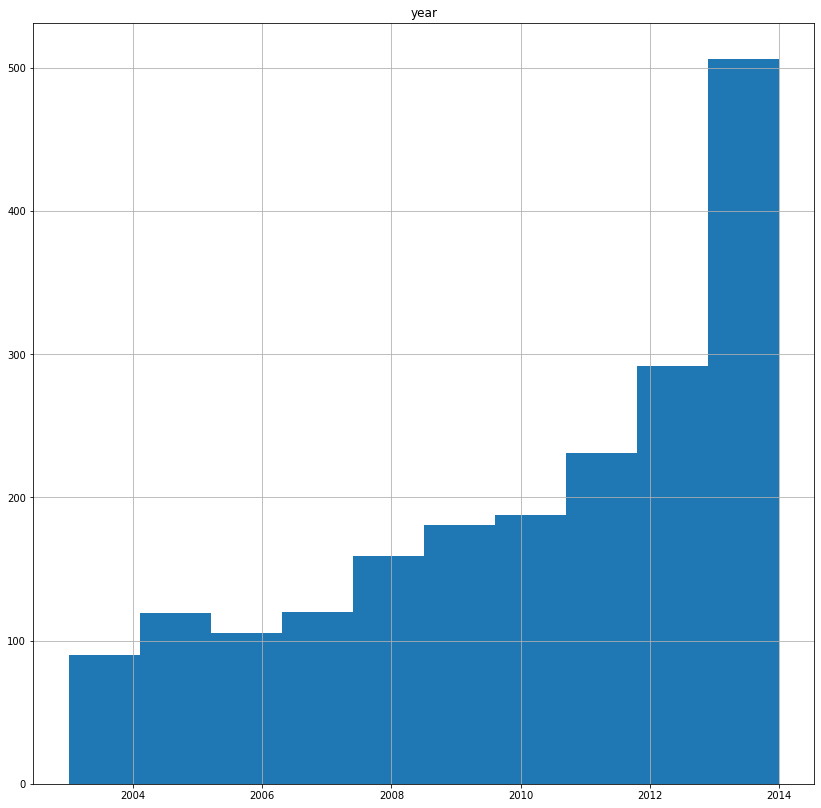

In [14]:
data.hist(figsize=(14,14))
plt.show()